<a href="https://colab.research.google.com/github/A-varshith/NLP_LAB/blob/main/NLP_LAB9_2403A52024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 9: Working with Pre-trained Word Embeddings — Word2Vec  



## STEP 1 — Install Required Libraries (Colab Only)


In [5]:
!pip install gensim --quiet
!pip install nltk --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 59.0 MB/s eta 0:00:00



## STEP 2 — Import Required Libraries

- gensim → load Word2Vec model  
- numpy → numerical operations  
- matplotlib → visualization  
- sklearn → PCA for dimensionality reduction  


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA



## STEP 3 — Download Pre-trained GoogleNews Word2Vec Model

This downloads the model directly from GitHub (raw file).
⚠ File size is ~1.6GB. First run may take time.


In [7]:

# Download directly from GitHub raw link
!wget -c https://github.com/mmihaltz/word2vec-GoogleNews-vectors/raw/master/GoogleNews-vectors-negative300.bin.gz


--2026-02-11 08:36:16--  https://github.com/mmihaltz/word2vec-GoogleNews-vectors/raw/master/GoogleNews-vectors-negative300.bin.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/mmihaltz/word2vec-GoogleNews-vectors/master/GoogleNews-vectors-negative300.bin.gz [following]
--2026-02-11 08:36:16--  https://media.githubusercontent.com/media/mmihaltz/word2vec-GoogleNews-vectors/master/GoogleNews-vectors-negative300.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 


## STEP 4 — Load the Model


In [8]:
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin.gz"

print("Loading model... (this may take few minutes)")
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

print("Model loaded successfully!")
print("Vocabulary size:", len(model.key_to_index))

Loading model... (this may take few minutes)
Model loaded successfully!
Vocabulary size: 3000000



Each word is represented as a 300-dimensional vector.
Each number is a learned feature capturing contextual meaning.



## STEP 5 — Word Similarity (10 Pairs)


In [9]:

word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("man", "woman"),
    ("paris", "france"),
    ("india", "china"),
    ("apple", "fruit"),
    ("teacher", "student"),
    ("computer", "technology")
]

for w1, w2 in word_pairs:
    print(f"{w1} - {w2}:", model.similarity(w1, w2))


doctor - nurse: 0.63195235
cat - dog: 0.76094574
car - bus: 0.4693371
king - queen: 0.6510957
man - woman: 0.76640123
paris - france: 0.5550796
india - china: 0.35330796
apple - fruit: 0.6410147
teacher - student: 0.63013655
computer - technology: 0.35386848



Higher cosine similarity → words are semantically closer.



## STEP 6 — Nearest Neighbor Exploration


In [10]:

words_to_check = ["king", "university", "doctor", "india", "technology"]

for word in words_to_check:
    print(f"Top similar words to '{word}':")
    for similar_word, score in model.most_similar(word, topn=5):
        print(similar_word, score)


Top similar words to 'king':
kings 0.7138045430183411
queen 0.6510956883430481
monarch 0.6413194537162781
crown_prince 0.6204220056533813
prince 0.6159993410110474
Top similar words to 'university':
universities 0.7003918886184692
faculty 0.6780907511711121
unversity 0.6758289933204651
undergraduate 0.6587094664573669
univeristy 0.6585438251495361
Top similar words to 'doctor':
physician 0.7806021571159363
doctors 0.747657299041748
gynecologist 0.6947518587112427
surgeon 0.6793398261070251
dentist 0.6785441040992737
Top similar words to 'india':
indian 0.6967039704322815
usa 0.6836211085319519
pakistan 0.681516706943512
chennai 0.6675503253936768
america 0.6589399576187134
Top similar words to 'technology':
technologies 0.8332264423370361
innovations 0.6230790615081787
technological_innovations 0.6102177500724792
technol 0.6047338247299194
technological_advancement 0.6036396622657776



## STEP 7 — Analogy Tasks


In [11]:

print("king - man + woman:")
print(model.most_similar(positive=["king", "woman"], negative=["man"], topn=5))

print("paris - france + india:")
print(model.most_similar(positive=["paris", "india"], negative=["france"], topn=5))

print("teacher - school + hospital:")
print(model.most_similar(positive=["teacher", "hospital"], negative=["school"], topn=5))


king - man + woman:
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581)]
paris - france + india:
[('chennai', 0.5442505478858948), ('delhi', 0.5149926543235779), ('mumbai', 0.5024341344833374), ('hyderabad', 0.49932485818862915), ('gujarat', 0.48732805252075195)]
teacher - school + hospital:
[('Hospital', 0.6331106424331665), ('nurse', 0.6280134320259094), ('hopsital', 0.6217317581176758), ('intensive_care', 0.5683753490447998), ('Hosptial', 0.5647749304771423)]



Embeddings solve analogies using vector arithmetic.
The model finds a word whose vector is closest to:
vector(A) - vector(B) + vector(C)



## STEP 8 — Visualization (PCA)


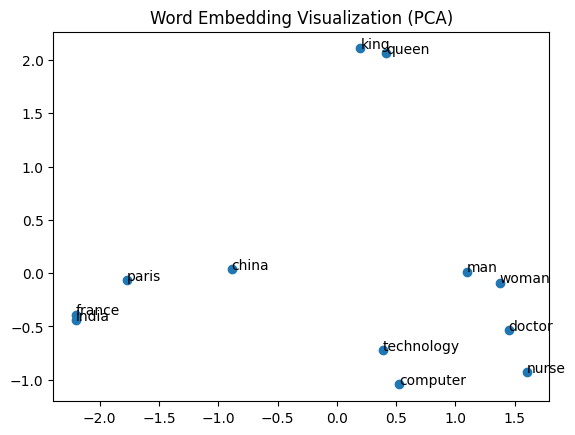

In [12]:

words = ["king", "queen", "man", "woman",
         "doctor", "nurse",
         "paris", "france", "india", "china",
         "computer", "technology"]

vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.text(reduced[i, 0], reduced[i, 1], word)

plt.title("Word Embedding Visualization (PCA)")
plt.show()
